In [9]:
#2.
import pandas as pd
import numpy as np

# 載入資料集，並指定'date'和'rtn'作為列名
data = pd.read_csv('C:/Users/user/OneDrive/文件/時間序列/Dataset-GARCH.txt')

# 計算對數收益率
#data['Log_Returns'] = data['rtn'].apply(lambda x: np.log(1 + x))
#print(data.columns)
print(data.head())

      date          rtn
0  19730131     0.01005
1  19730228    -0.13930
2  19730330     0.06936
3  19730430     0.08649
4  19730531    -0.10448


In [10]:
import pandas as pd
import numpy as np

# 載入資料集，並指定正確的分隔符號和列名
data = pd.read_csv('C:/Users/user/OneDrive/文件/時間序列/Dataset-GARCH.txt', sep='\s+', names=['date', 'rtn'])

# 計算對數收益率
data['rtn'] = data['rtn'].astype(float)

# 將'date'轉換為日期時間格式
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

# 計算對數收益率
data['Log_Returns'] = np.log(1 + data['rtn'])

print(data.head())

ValueError: could not convert string to float: 'rtn'

In [41]:
import pandas as pd
import numpy as np

# 載入資料集，並指定正確的分隔符號和列名
data = pd.read_csv('C:/Users/user/OneDrive/文件/時間序列/Dataset-GARCH.txt', sep='\s+', skiprows=1, names=['date', 'rtn'])

# 將'rtn'列中的資料轉換為浮點數
data['rtn'] = data['rtn'].astype(float)

# 將'date'轉換為日期時間格式
data['date'] = pd.to_datetime(data['date'] , format='%Y%m%d' )  ###

# 計算對數收益率
data['Log_Returns'] = np.log(1 + data['rtn'])

print(data.head())

        date      rtn  Log_Returns
0 1973-01-31  0.01005     0.010000
1 1973-02-28 -0.13930    -0.150009
2 1973-03-30  0.06936     0.067060
3 1973-04-30  0.08649     0.082952
4 1973-05-31 -0.10448    -0.110351


In [35]:
data.head()

,date,rtn,Log_Returns
0,1973-01-31,0.01005,0.010000
1,1973-02-28,-0.13930,-0.150009
2,1973-03-30,0.06936,0.067060
3,1973-04-30,0.08649,0.082952
4,1973-05-31,-0.10448,-0.110351


In [19]:
data.columns

Index(['date', 'rtn', 'Log_Returns'], dtype='object')

In [6]:
#2. (a)
    
#虛無假設（Null Hypothesis）：資料中不存在自相關的異方差效應（即無ARCH效應）。
#對立假設（Alternative Hypothesis）：資料中存在自相關的異方差效應（即存在ARCH效應）。

!pip install arch
from arch import arch_model

model = arch_model(data['Log_Returns'], vol='ARCH')

# 擬合模型
results = model.fit()

# 顯示模型摘要
print(results.summary())

#實施lm test
lm_test = results.arch_lm_test(lags=10)
print(lm_test)

#結果 p<0.05 有arch效應

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4832.781625851145
Iteration:      2,   Func. Count:     14,   Neg. LLF: 58.30979565021759
Iteration:      3,   Func. Count:     21,   Neg. LLF: -216.59292783081236
Iteration:      4,   Func. Count:     26,   Neg. LLF: -230.04803910393764
Iteration:      5,   Func. Count:     30,   Neg. LLF: -230.0481100032679
Iteration:      6,   Func. Count:     33,   Neg. LLF: -230.04811000336025
Optimization terminated successfully    (Exit mode 0)
            Current function value: -230.0481100032679
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                230.048
Distribution:                  Normal

C:\Users\user\anaconda3\envs\v37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01784. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [7]:
lm_test = results.arch_lm_test(lags=10)
print(lm_test)

ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 34.2013
P-value: 0.0002
Distributed: chi2(10)


In [8]:
#2.(b)
# 擬合 GARCH 模型
garch_model = arch_model(data['Log_Returns'], vol='GARCH')
garch_results = garch_model.fit()

    # 打印模型摘要
print(garch_results.summary())



Iteration:      1,   Func. Count:      6,   Neg. LLF: 27230887568235.633
Iteration:      2,   Func. Count:     16,   Neg. LLF: 956659.1583637738
Iteration:      3,   Func. Count:     24,   Neg. LLF: 113034.73798615356
Iteration:      4,   Func. Count:     30,   Neg. LLF: -231.1898478687413
Iteration:      5,   Func. Count:     36,   Neg. LLF: 765.1055392386696
Iteration:      6,   Func. Count:     42,   Neg. LLF: -233.82842158074664
Iteration:      7,   Func. Count:     48,   Neg. LLF: 10140.373563911116
Iteration:      8,   Func. Count:     54,   Neg. LLF: -236.70384197587896
Iteration:      9,   Func. Count:     60,   Neg. LLF: -240.9688708007826
Iteration:     10,   Func. Count:     66,   Neg. LLF: -241.6333172172217
Iteration:     11,   Func. Count:     72,   Neg. LLF: -241.63682500109775
Iteration:     12,   Func. Count:     78,   Neg. LLF: -241.63921061637276
Iteration:     13,   Func. Count:     82,   Neg. LLF: -241.6392106165132
Optimization terminated successfully    (Exit mod

C:\Users\user\anaconda3\envs\v37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01784. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [9]:
# 均值方程式 (Mean Equation)
mu_t = 0.0164
print("均值方程式 (Mean Equation):")
print("μ_t =", mu_t)

# 波動度方程式 (Volatility Equation)
omega = 8.2438e-4
alpha_1 = 0.0618
beta_1 = 0.8853
print("\n波動度方程式 (Volatility Equation):")
print("σ^2_t =", omega, "+", alpha_1, "× a^2_(t-1)", "+", beta_1, "× σ^2_(t-1)")

均值方程式 (Mean Equation):
μ_t = 0.0164

波動度方程式 (Volatility Equation):
σ^2_t = 0.00082438 + 0.0618 × a^2_(t-1) + 0.8853 × σ^2_(t-1)


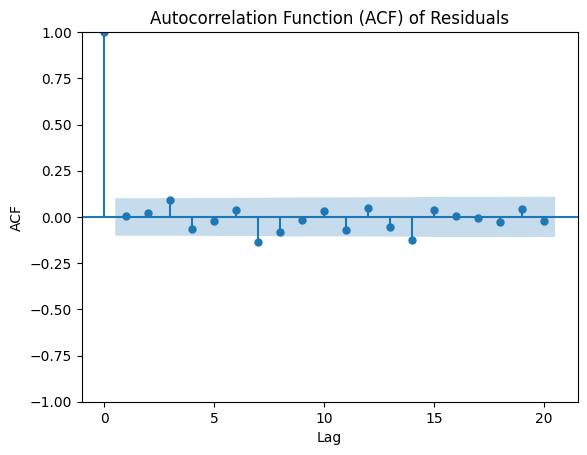

In [10]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 模型殘差
residuals = garch_results.resid

# 繪製殘差的自相關函數 (ACF) 圖
sm.graphics.tsa.plot_acf(residuals, lags=20)
plt.title("Autocorrelation Function (ACF) of Residuals")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

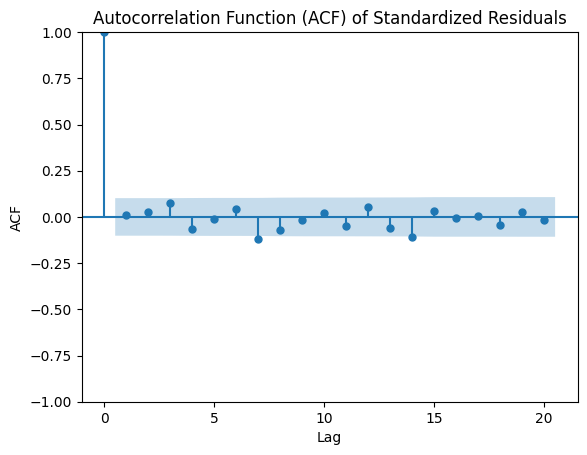

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 標準化殘差
standardized_residuals = residuals / np.sqrt(garch_results.conditional_volatility)

# 繪製標準化殘差的自相關函數 (ACF) 圖
sm.graphics.tsa.plot_acf(standardized_residuals, lags=20)
plt.title("Autocorrelation Function (ACF) of Standardized Residuals")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

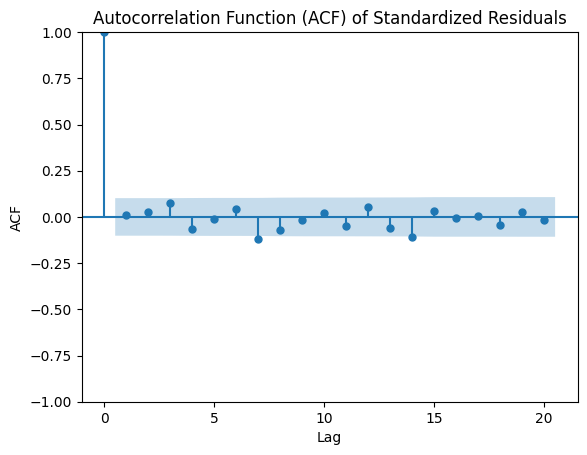

LM Test p-value: 0.10472107046578688


In [12]:
#2.(c) (10%): Similar to problem 1-(d), we would like to check whether the fitted GARCH model is reasonable
#by checking its residual. How do you do this for a GARCH model? What’s your conclusion?

from statsmodels.stats.diagnostic import acorr_ljungbox

# 计算标准化残差
standardized_residuals = residuals / np.sqrt(garch_results.conditional_volatility)

# 绘制标准化残差的自相关函数（ACF）
sm.graphics.tsa.plot_acf(standardized_residuals, lags=20)
plt.title("Autocorrelation Function (ACF) of Standardized Residuals")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

# 进行 LM 检验
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=False)
print("LM Test p-value:", lb_test[1][0])

# 做出來沒有顯著自我相關 變異數
#根據LM結果 此GARCH模型在10個LAG上是沒有自相關性的
# P-VALUE>0.05   殘差序列不存在自相關性 此GARCH模型不合理

In [38]:
data.head()
print(data['date'].dtype)

datetime64[ns]


In [39]:
#2.(d) (10%) Based on the GARCH model you fit, compute 1-step to 5-step ahead volatility forecasts at the
#forecast origin December 2003.

forecast_horizon = 5

# 将日期时间列设置为时间序列的索引
#data.set_index('date', inplace=True)
# 将日期字符串转换为 datetime64 类型
start_date = pd.to_datetime('2003-12-01')

# 使用已拟合的 GARCH 模型进行波动率预测
forecasts = garch_results.forecast(start=start_date, horizon=forecast_horizon)

# 提取波动率预测
volatility_forecasts = forecasts.variance[start_date:]

# 打印出波动率预测
print("Volatility forecasts at forecast origin December 2003:")
print(volatility_forecasts)

Volatility forecasts at forecast origin December 2003:
                 h.1       h.2       h.3       h.4       h.5
date                                                        
2003-12-31  0.016515  0.016465  0.016419  0.016374  0.016333


C:\Users\user\anaconda3\envs\v37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [40]:
#2.(e)(10%) Based on the GARCH model you fit, compute 1-step to 5-step ahead Yt forecasts at the forecast
#origin December 2003.

import pandas as pd
start_date = pd.to_datetime('2003-12-01')

# 使用已拟合的 GARCH 模型进行波动率预测
forecasts = garch_results.forecast(start=start_date, horizon=5)

# 提取前瞻 Yt 预测
yt_forecasts = forecasts.mean[start_date:]

# 打印出 Yt 预测
print("Yt forecasts from the last observation:")
print(yt_forecasts)

Yt forecasts from the last observation:
                 h.1       h.2       h.3       h.4       h.5
date                                                        
2003-12-31  0.016424  0.016424  0.016424  0.016424  0.016424


C:\Users\user\anaconda3\envs\v37\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
